# Around The World

In this section you're going to work on a Database containing countries and cities over the world with corresponding languages spoken.

### General instructions

Solve all questions inside this notebook by filling it out with Python code.

## Loading the Database

Using the shell (or any other way of your cohice), load the attached database ("world_x") to your local MySQL server.

### SQL

In [3]:
# If you'd like to use another package for interacting with MySQL it's fine. Just update this template accordingly.
import pymysql

import pymysql.cursors
import matplotlib.pyplot as plt
import json

import pandas as pd
import numpy as np

In [7]:
username = 'root'

connection = pymysql.connect(user=username, database='world_x', password = "preacher")
cur = connection.cursor()


# In case you have an Access Denied exception on Linux machines, try to use this: https://askubuntu.com/questions/766334/cant-login-as-mysql-user-root-from-normal-user-account-in-ubuntu-16-04

###### 1. Explore the database by outputing the tables and the columns of each table

In [8]:
cur.execute("show tables")

4

In [12]:
# Solution

queries = ["SHOW TABLES", "SHOW COLUMNS FROM city", 
           "SHOW COLUMNS FROM countryinfo",  "SHOW COLUMNS FROM countrylanguage"]
cur.execute("SHOW TABLES");
output = cur.fetchall()
print(output)

for table in output:
    cur.execute("SHOW COLUMNS FROM " + table[0])
    tab = cur.fetchall()
    print ("***************************************")
    print(tab)
# for query in queries:
#     cur.execute(query)
#     table_output = cur.fetchall()
#     print (table_output)
#     print("************************************************************")





(('city',), ('country',), ('countryinfo',), ('countrylanguage',))
***************************************
(('ID', 'int(11)', 'NO', 'PRI', None, 'auto_increment'), ('Name', 'char(35)', 'NO', '', '', ''), ('CountryCode', 'char(3)', 'NO', '', '', ''), ('District', 'char(20)', 'NO', '', '', ''), ('Info', 'json', 'YES', '', None, ''))
***************************************
(('Code', 'char(3)', 'NO', 'PRI', '', ''), ('Name', 'char(52)', 'NO', '', '', ''), ('Capital', 'int(11)', 'YES', '', None, ''), ('Code2', 'char(2)', 'NO', '', '', ''))
***************************************
(('doc', 'json', 'YES', '', None, ''), ('_id', 'varchar(32)', 'NO', 'PRI', None, 'STORED GENERATED'))
***************************************
(('CountryCode', 'char(3)', 'NO', 'PRI', '', ''), ('Language', 'char(30)', 'NO', 'PRI', '', ''), ('IsOfficial', "enum('T','F')", 'NO', '', 'F', ''), ('Percentage', 'float(4,1)', 'NO', '', '0.0', ''))


###### 2. Using SQL only, list all capital cities in the database, ordered alphabetically.

In [40]:
# Solution
#cur.execute("SELECT capital FROM country")
#output = cur.fetchall()
#print (output)
#cur.execute("select Name from city")
#cur.execute("select capital from country")
#cur.execute(" select Name from city where city.ID in (select capital from country;) asc;")
#cur.execute("select Name from city where ID  in (select capital from country) asc;")
cur.execute('select city.Name from city join country on city.ID=country.Capital;')
output = cur.fetchall()
print(output)

(('Oranjestad',), ('Kabul',), ('Luanda',), ('The Valley',), ('Tirana',), ('Andorra la Vella',), ('Willemstad',), ('Abu Dhabi',), ('Buenos Aires',), ('Yerevan',), ('Fagatogo',), ('Saint John´s',), ('Canberra',), ('Wien',), ('Baku',), ('Bujumbura',), ('Bruxelles [Brussel]',), ('Porto-Novo',), ('Ouagadougou',), ('Dhaka',), ('Sofija',), ('al-Manama',), ('Nassau',), ('Sarajevo',), ('Minsk',), ('Belmopan',), ('Hamilton',), ('La Paz',), ('Brasília',), ('Bridgetown',), ('Bandar Seri Begawan',), ('Thimphu',), ('Gaborone',), ('Bangui',), ('Ottawa',), ('West Island',), ('Bern',), ('Santiago de Chile',), ('Peking',), ('Yamoussoukro',), ('Yaoundé',), ('Kinshasa',), ('Brazzaville',), ('Avarua',), ('Santafé de Bogotá',), ('Moroni',), ('Praia',), ('San José',), ('La Habana',), ('Flying Fish Cove',), ('George Town',), ('Nicosia',), ('Praha',), ('Berlin',), ('Djibouti',), ('Roseau',), ('København',), ('Santo Domingo de Guzmán',), ('Alger',), ('Quito',), ('Cairo',), ('Asmara',), ('El-Aaiún',), ('Madrid',

###### 3. Which are the 10 countries with the heighest number of cities associated with them? Display the country name and the corresponding number of cities (In a descending order by the number of cities). Use SQL only.

In [53]:
# Solution
cur.execute("select country.Name, count(city.Name) from country, city where city.CountryCode=country.Code group by country.Name order by count(city.Name) DESC limit 10;") 
output = cur.fetchall()
print(output)

(('China', 363), ('India', 341), ('United States', 274), ('Brazil', 250), ('Japan', 248), ('Russian Federation', 189), ('Mexico', 173), ('Philippines', 136), ('Germany', 93), ('Indonesia', 85))


###### 4. Using SQL only, calculate the average percent use of the language that is considered official in the highest number of countries. The average percent use should be calculated only using countries in which the language is considered official in.

In [ ]:
(('city',), ('country',), ('countryinfo',), ('countrylanguage',))
***************************************
(('ID', 'int(11)', 'NO', 'PRI', None, 'auto_increment'), ('Name', 'char(35)', 'NO', '', '', ''), ('CountryCode', 'char(3)', 'NO', '', '', ''), ('District', 'char(20)', 'NO', '', '', ''), ('Info', 'json', 'YES', '', None, ''))
***************************************
(('Code', 'char(3)', 'NO', 'PRI', '', ''), ('Name', 'char(52)', 'NO', '', '', ''), ('Capital', 'int(11)', 'YES', '', None, ''), ('Code2', 'char(2)', 'NO', '', '', ''))
***************************************
(('doc', 'json', 'YES', '', None, ''), ('_id', 'varchar(32)', 'NO', 'PRI', None, 'STORED GENERATED'))
***************************************
(('CountryCode', 'char(3)', 'NO', 'PRI', '', ''), ('Language', 'char(30)', 'NO', 'PRI', '', ''), ('IsOfficial', "enum('T','F')", 'NO', '', 'F', ''), ('Percentage', 'float(4,1)', 'NO', '', '0.0', ''))


In [64]:
# Solution
cur.execute("select Language, number_of_countries/overall_percentage from (select count(CountryCode) as number_of_countries,  sum(Percentage) as overall_percentage, Language from countrylanguage where IsOfficial='T' group by Language ASC limit 1) as table1; ")
output = cur.fetchall()
print(output)

(('Afrikaans', 0.06993),)


/home/roee/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (1287, "'GROUP BY with ASC/DESC' is deprecated and will be removed in a future release. Please use GROUP BY ... ORDER BY ... ASC/DESC instead")
  result = self._query(query)


###### 5. Plot a histogram of the Independence Years of the countries in the database. The independence year is located inside the countryinfo table under the doc column (Hint: you need to parse it using Python).

In [65]:
# Solution
query ="SELECT * FROM countryinfo"
cur.execute(query)
output = cur.fetchall()
print (output[0])

('{"GNP": 828, "_id": "ABW", "Name": "Aruba", "IndepYear": null, "geography": {"Region": "Caribbean", "Continent": "North America", "SurfaceArea": 193}, "government": {"HeadOfState": "Beatrix", "GovernmentForm": "Nonmetropolitan Territory of The Netherlands"}, "demographics": {"Population": 103000, "LifeExpectancy": 78.4000015258789}}', 'ABW')


In [68]:
df = pd.DataFrame(list(output), columns = ['doc','_id'])
years = []
for index, row in df.iterrows():
    row['doc'] = json.loads(row['doc'])
    years.append(row['doc'].get('IndepYear'))
df['indep_year'] = years


df = df[pd.notnull(df['indep_year'])]
df = df[df['indep_year']>0]

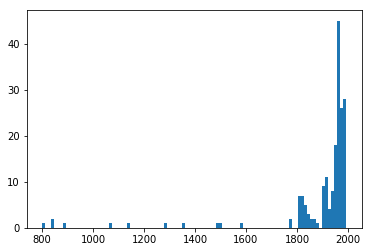

In [72]:
plt.hist(df.indep_year, bins = 100)
plt.show()

###### 6. Plot a pie chart of the language usage in South Africa (CountryCode = ZAF).

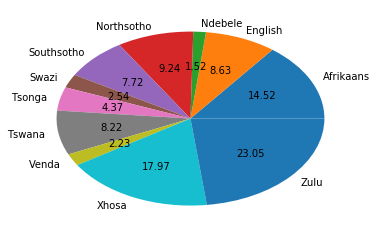

In [79]:
# Solution

cur.execute("SELECT * FROM countrylanguage WHERE CountryCode = 'ZAF';")
output = cur.fetchall()
df = pd.DataFrame(list(output), columns = ['country_code', 'language', 'official', 'percentage'])
plt.pie(df.percentage, labels= df.language, autopct='%.2f')
plt.show()

###### BONUS I: Extract the top 5 countries that are used in the heighest number of countries. Plot a Pie Chart of their usage.

In [ ]:
# Solution

###### BONUS II: considering the plot of Q4, next to each year in the histogram add another column representing the average population of the countries announced their independence in the same year.

In [ ]:
# Solution

In [ ]:
cur.close()
cnx.close()